# Fourier analysis (MSAP4-01A)

In [1]:
import plato_msap4_demonstrator as msap4
import plato_msap4_demonstrator_datasets.plato_sim_dataset as plato_sim_dataset

## Rotation period analysis

In [2]:
filename = msap4.get_target_filename (plato_sim_dataset, '000', filetype='csv')
t, s, dt = msap4.load_resource (filename)

Text(0, 0.5, 'Flux (ppm)')

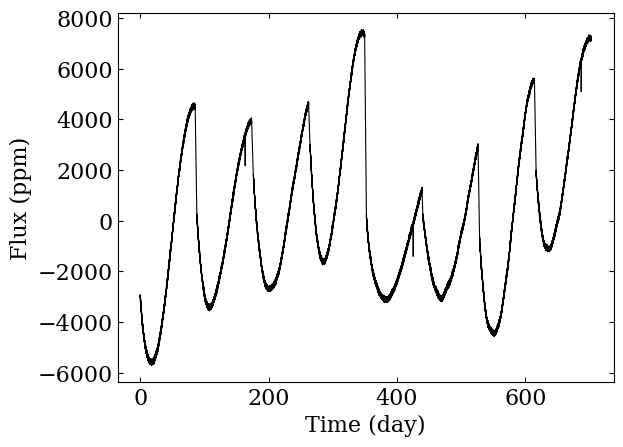

In [3]:
fig, ax = plt.subplots (1, 1)

ax.plot (t-t[0], s, color='black')

ax.set_xlabel ('Time (day)')
ax.set_ylabel ('Flux (ppm)')

As we want to recover rotation periods below 45 days, we only consider the section of the periodogram verifying $P < P_\mathrm{cutoff} = 45$ days.

In [4]:
pcutoff = 45

array([[4.38228926e+001, 2.47303952e+000, 7.84409101e-003,
        1.86360761e-164],
       [2.87528288e+001, 2.83021954e-001, 5.06241303e-003,
        2.49655319e-104],
       [3.87944762e+001, 2.09590363e+000, 1.80996593e-003,
        3.07150311e-034],
       [2.69679339e+001, 5.95430152e-001, 1.90767646e-003,
        2.42675131e-036],
       [3.47256617e+001, 3.43994297e-001, 3.62246704e-002,
        0.00000000e+000]])

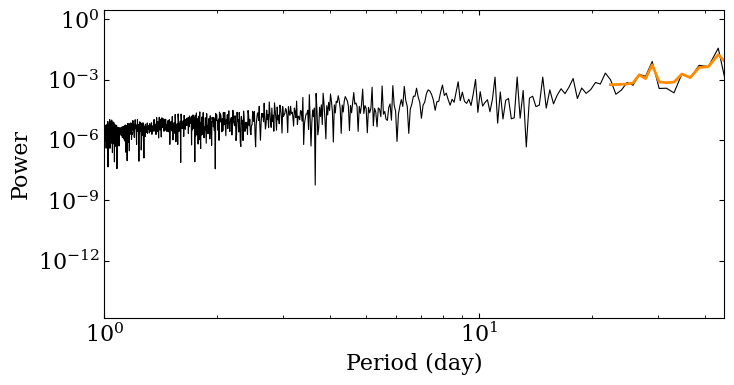

In [5]:
p_ps, ps_object = msap4.compute_lomb_scargle (t, s)
ls = ps_object.power_standard_norm
cond = p_ps < pcutoff
prot, e_p, E_p, param, h_ps = msap4.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[cond], ls[cond], n_profile=5, 
                                                                                     threshold=0.1,
                                                                                     verbose=False)
msap4.plot_ls (p_ps, ls, filename=None, param_profile=param, 
               logscale=True, xlim=(1, pcutoff))
idp = msap4.prepare_idp_fourier (ps_object, param, h_ps,
                           pcutoff=pcutoff, pthresh=None,
                           fapcutoff=1e-6)
idp

## Long term modulation analysis

This time, we are interested in recovering long term modulations. We consider the section of the periodogram verifying $P > P_\mathrm{tresh} = 90$ days.

In [6]:
pthresh = 90

array([[3.50583141e+02, 9.28193154e+01, 1.60369223e-02, 0.00000000e+00],
       [7.01166282e+02, 4.42222692e+03, 1.00210883e-01, 0.00000000e+00],
       [3.50583141e+02, 3.06636916e+01, 1.60369223e-02, 0.00000000e+00],
       [7.01166282e+02, 6.20790527e+01, 1.00210883e-01, 0.00000000e+00],
       [3.50583141e+02, 3.22199134e+01, 1.60369223e-02, 0.00000000e+00]])

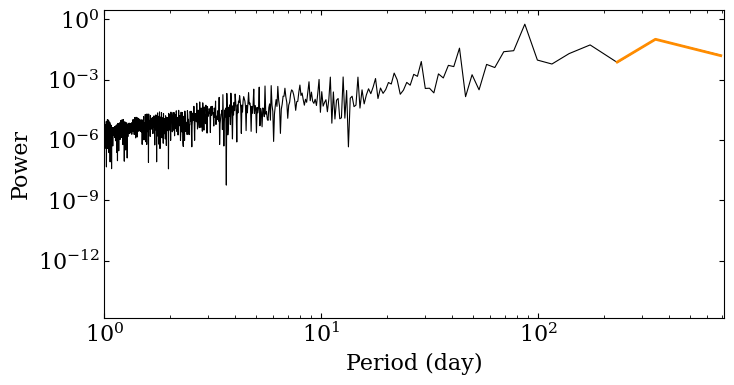

In [7]:
p_ps, ps_object = msap4.compute_lomb_scargle (t, s)
ls = ps_object.power_standard_norm
plongterm, e_p, E_p, param, h_ps = msap4.compute_prot_err_gaussian_fit_chi2_distribution (p_ps[p_ps>pthresh], ls[p_ps>pthresh], 
                                                                                          n_profile=5, threshold=0.1, verbose=False)
fig = msap4.plot_ls (p_ps, ls, filename=None, param_profile=param, 
                    logscale=True, xlim=(1,8*pthresh))
idp = msap4.prepare_idp_fourier (ps_object, param, h_ps,
                           pcutoff=None, pthresh=pthresh,
                           fapcutoff=1e-6)
idp